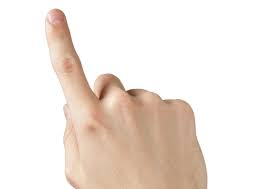

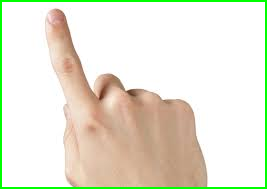

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect fingers in a static image
def detect_fingers(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply thresholding to create a binary image
    _, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area to keep only the fingers
    fingers = []
    for contour in contours:
        if cv2.contourArea(contour) > 1000:
            fingers.append(contour)

    # Draw bounding boxes around detected fingers
    result_image = image.copy()
    cv2.drawContours(result_image, fingers, -1, (0, 255, 0), 2)

    # Display the original and result images
    cv2_imshow(image)
    cv2_imshow(result_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Call the detect_fingers function with the path to your image
detect_fingers("/content/finger image.jpg")


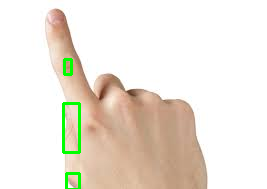

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect and draw bounding boxes around the nail part of fingers in a static image
def detect_and_draw_nails(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply adaptive thresholding to create a binary image
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area to keep only the nail part
    nail_regions = []
    for contour in contours:
        if cv2.contourArea(contour) > 50 and cv2.contourArea(contour) < 500:
            nail_regions.append(contour)

    # Draw bounding boxes around the nail regions
    for contour in nail_regions:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original image with bounding boxes around nails
    cv2_imshow(image)

# Call the detect_and_draw_nails function with the path to your image
detect_and_draw_nails("/content/finger image.jpg")


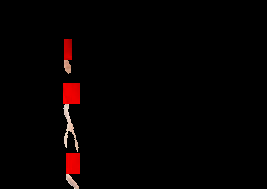

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect and overlay a block on the nail part of fingers in a static image
def overlay_block_on_nails(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply adaptive thresholding to create a binary image
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area to keep only the nail part
    nail_regions = []
    for contour in contours:
        if cv2.contourArea(contour) > 50 and cv2.contourArea(contour) < 500:
            nail_regions.append(contour)

    # Create a mask for the nail regions
    nail_mask = np.zeros_like(image)

    # Draw filled contours (nail regions) on the mask
    cv2.drawContours(nail_mask, nail_regions, -1, (255, 255, 255), thickness=cv2.FILLED)

    # Create a block (a colored rectangle) to overlay
    block_color = (0, 0, 255)  # Red block color (BGR format)
    block_height = 20  # Height of the block
    for contour in nail_regions:
        x, y, w, h = cv2.boundingRect(contour)
        block_y = y - block_height  # Adjust the block position above the nail
        cv2.rectangle(nail_mask, (x, block_y), (x + w, y), block_color, thickness=cv2.FILLED)

    # Bitwise AND the original image with the nail mask
    result_image = cv2.bitwise_and(image, nail_mask)

    # Display the original image with the block overlaid on nails
    cv2_imshow(result_image)

# Call the overlay_block_on_nails function with the path to your image
overlay_block_on_nails("/content/finger image.jpg")


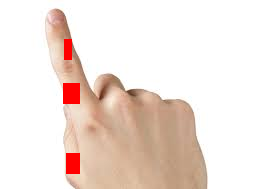

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to overlay a block on the nail part of fingers in a static image
def overlay_block_on_nails(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply adaptive thresholding to create a binary image
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area to keep only the nail part
    nail_regions = []
    for contour in contours:
        if cv2.contourArea(contour) > 50 and cv2.contourArea(contour) < 500:
            nail_regions.append(contour)

    # Create a block (a colored rectangle) to overlay
    block_color = (0, 0, 255)  # Red block color (BGR format)
    block_height = 20  # Height of the block
    for contour in nail_regions:
        x, y, w, h = cv2.boundingRect(contour)
        block_y = y - block_height  # Adjust the block position above the nail
        cv2.rectangle(image, (x, block_y), (x + w, y), block_color, thickness=cv2.FILLED)

    # Display the original image with the block overlaid on nails
    cv2_imshow(image)

# Call the overlay_block_on_nails function with the path to your image
overlay_block_on_nails("/content/finger image.jpg")
